Past Covariate Time Series Forecasting

Past Covariates allows us to include other known past features beyond the target variable

In [1]:
from autogluon.timeseries import TimeSeriesDataFrame, TimeSeriesPredictor

In [2]:
train_data = TimeSeriesDataFrame("data/one_year_air_pollution.csv")
train_data

pollution  dew  temp   press  \
item_id             timestamp                                           
PM2.5 Air Pollution 2014-01-01 00:00:00       24.0  -20   7.0  1014.0   
                    2014-01-01 01:00:00       53.0  -20   7.0  1013.0   
                    2014-01-01 02:00:00       65.0  -20   6.0  1013.0   
                    2014-01-01 03:00:00       70.0  -20   6.0  1013.0   
                    2014-01-01 04:00:00       79.0  -18   3.0  1012.0   
...                                            ...  ...   ...     ...   
                    2014-12-31 19:00:00        8.0  -23  -2.0  1034.0   
                    2014-12-31 20:00:00       10.0  -22  -3.0  1034.0   
                    2014-12-31 21:00:00       10.0  -22  -3.0  1034.0   
                    2014-12-31 22:00:00        8.0  -22  -4.0  1034.0   
                    2014-12-31 23:00:00       12.0  -21  -3.0  1034.0   

                                         wnd_spd  snow  rain  
item_id             timestamp                                 
PM2.5 Air Pollution 2014-01-01 00:00:00   143.48     0     0  
                    2014-01-01 01:00:00   147.50     0     0  
                    2014-01-01 02:00:00   151.52     0     0  
                    2014-01-01 03:00:00   153.31     0     0  
                    2014-01-01 04:00:00     0.89     0     0  
...                                          ...   ...   ...  
                    2014-12-31 19:00:00   231.97     0     0  
                    2014-12-31 20:00:00   237.78     0     0  
                    2014-12-31 21:00:00   242.70     0     0  
                    2014-12-31 22:00:00   246.72     0     0  
                    2014-12-31 23:00:00   249.85     0     0  

[8760 rows x 7 columns]

In [3]:
predictor = TimeSeriesPredictor(prediction_length=24*7,
                                target="pollution") # Hourly Data

In [4]:
predictor.fit(train_data)

================ TimeSeriesPredictor ================
TimeSeriesPredictor.fit() called
Fitting with arguments:
{'enable_ensemble': True,
 'evaluation_metric': None,
 'hyperparameter_tune_kwargs': None,
 'hyperparameters': 'default',
 'prediction_length': 168,
 'random_seed': None,
 'target': 'pollution',
 'time_limit': None}
Provided training data set with 8760 rows, 1 items (item = single time series). Average time series length is 8760.0.
Training artifacts will be saved to: C:\Users\manor\Downloads\Automated Machine Learning with AutoGluon Library in Python\02_TimeSeries_Forecasting\AutogluonModels\ag-20230418_034953
AutoGluon will save models to AutogluonModels\ag-20230418_034953\
AutoGluon will gauge predictive performance using evaluation metric: 'mean_wQuantileLoss'
	This metric's sign has been flipped to adhere to being 'higher is better'. The reported score can be multiplied by -1 to get the metric value.

Provided dataset contains following columns:
	target:           'pollut

In [5]:
predictions = predictor.predict(train_data)
predictions

Global seed set to 123
Model not specified in predict, will default to the model with the best validation score: WeightedEnsemble


mean        0.1       0.2  \
item_id             timestamp                                             
PM2.5 Air Pollution 2015-01-01 00:00:00  30.414691   2.380491  8.863397   
                    2015-01-01 01:00:00  30.194400   0.083104  7.155689   
                    2015-01-01 02:00:00  28.926022  -2.932340  4.736941   
                    2015-01-01 03:00:00  29.432640  -4.223668  4.208138   
                    2015-01-01 04:00:00  34.645934   0.018612  8.628715   
...                                            ...        ...       ...   
                    2015-01-07 19:00:00  65.387988 -33.639155 -2.526227   
                    2015-01-07 20:00:00  63.661770 -35.748377 -5.587238   
                    2015-01-07 21:00:00  62.968411 -37.694466 -6.562965   
                    2015-01-07 22:00:00  65.541858 -35.941490 -3.966063   
                    2015-01-07 23:00:00  70.981395 -30.484292  0.940055   

                                               0.3        0.4        0.5  \
item_id             timestamp                                              
PM2.5 Air Pollution 2015-01-01 00:00:00  14.365206  20.206070  26.525861   
                    2015-01-01 01:00:00  13.235149  19.569056  26.271256   
                    2015-01-01 02:00:00  11.267354  17.972872  24.990516   
                    2015-01-01 03:00:00  11.142509  18.161433  25.530835   
                    2015-01-01 04:00:00  15.787665  23.082782  30.644874   
...                                            ...        ...        ...   
                    2015-01-07 19:00:00  20.047955  40.627367  60.892756   
                    2015-01-07 20:00:00  17.461283  38.659361  59.318092   
                    2015-01-07 21:00:00  17.283306  38.432964  58.643697   
                    2015-01-07 22:00:00  19.711387  40.882696  61.445295   
                    2015-01-07 23:00:00  24.630974  46.422500  66.886520   

                                               0.6         0.7         0.8  \
item_id             timestamp                                                
PM2.5 Air Pollution 2015-01-01 00:00:00  33.088960   41.133854   50.808918   
                    2015-01-01 01:00:00  33.295522   41.766371   51.896600   
                    2015-01-01 02:00:00  32.358377   41.255856   51.885557   
                    2015-01-01 03:00:00  33.160877   42.396318   53.365736   
                    2015-01-01 04:00:00  38.560747   48.022505   59.506244   
...                                            ...         ...         ...   
                    2015-01-07 19:00:00  81.563265  104.740100  132.010140   
                    2015-01-07 20:00:00  80.232199  103.605367  131.106853   
                    2015-01-07 21:00:00  79.698986  102.771059  130.345841   
                    2015-01-07 22:00:00  82.439134  105.853784  133.389810   
                    2015-01-07 23:00:00  87.259448  111.557698  139.411584   

                                                0.9  
item_id             timestamp                        
PM2.5 Air Pollution 2015-01-01 00:00:00   64.250617  
                    2015-01-01 01:00:00   66.354797  
                    2015-01-01 02:00:00   66.569389  
                    2015-01-01 03:00:00   68.679230  
                    2015-01-01 04:00:00   75.352116  
...                                             ...  
                    2015-01-07 19:00:00  170.092115  
                    2015-01-07 20:00:00  170.172604  
                    2015-01-07 21:00:00  168.713844  
                    2015-01-07 22:00:00  172.767548  
                    2015-01-07 23:00:00  178.236736  

[168 rows x 10 columns]

In [6]:
import matplotlib.pyplot as plt

In [7]:
def plot_predictions(train_data, predictions, item_id, target_col):
    plt.figure(figsize=(20,5), dpi=150)

    # Y predictions
    y_pred = predictions.loc[item_id]

    # Y historical values
    y_past = train_data.loc[item_id][target_col]

    # Plot historical Values against best models predictions
    plt.plot(y_past, label="Known Past Historical Values")
    plt.plot(y_pred['mean'], label="Mean Forecast")

    plt.fill_between(
        y_pred.index, y_pred["0.1"], y_pred["0.9"], color="red", alpha=0.1, label="10-90% Confidence Level"
    )

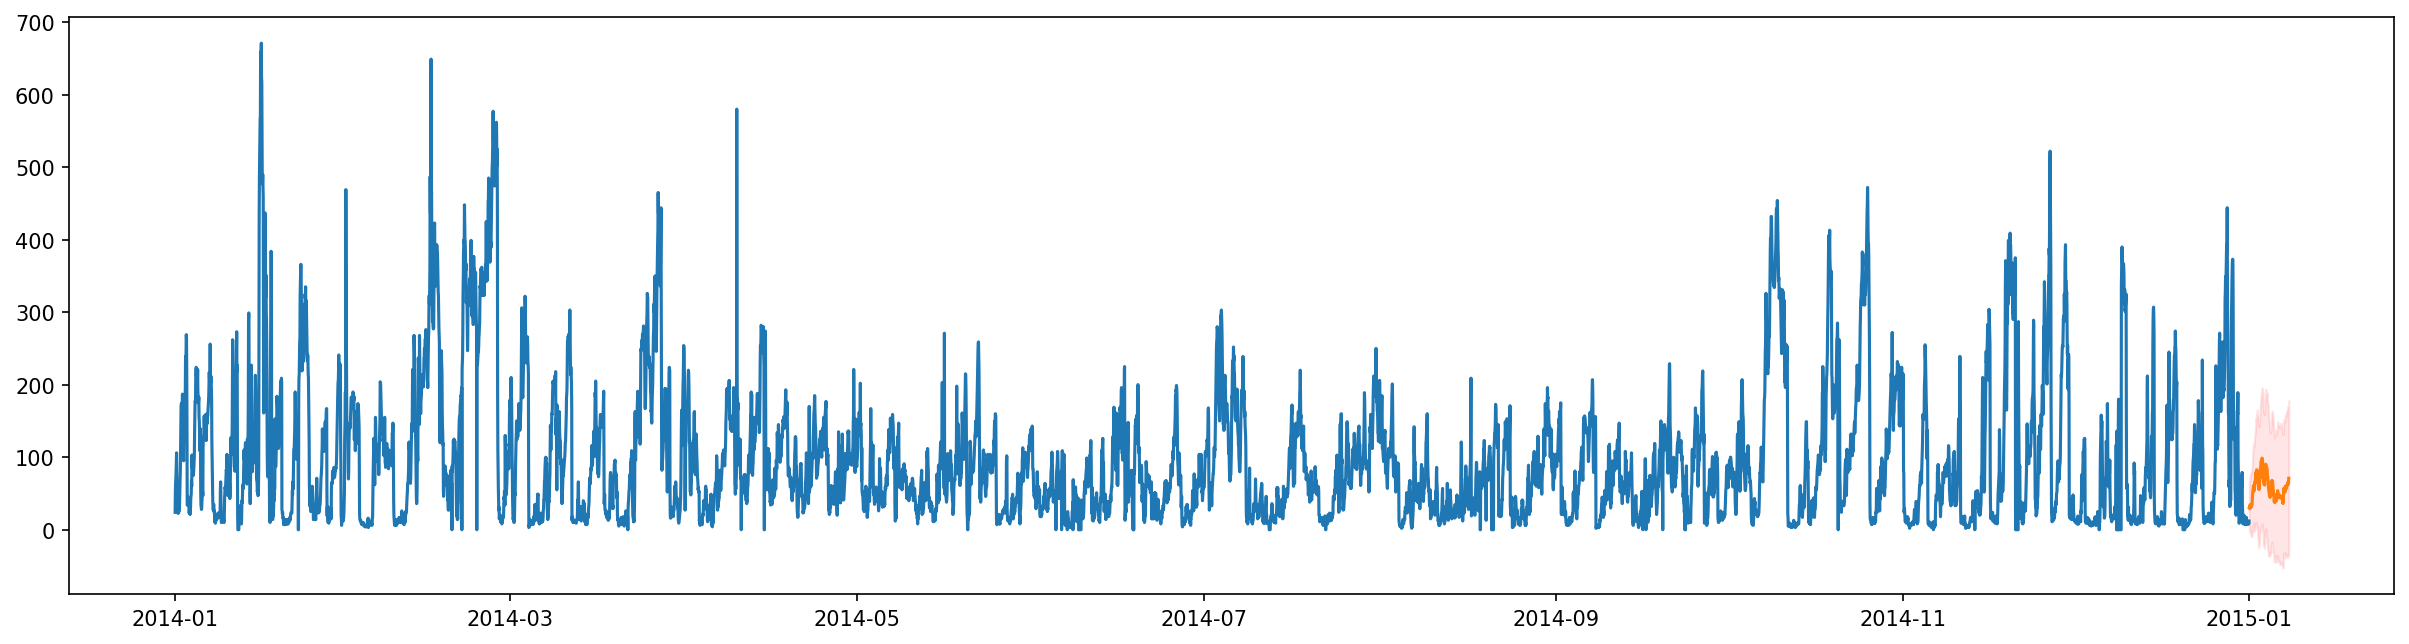

In [8]:
plot_predictions(train_data=train_data,
                 predictions=predictions,
                 item_id="PM2.5 Air Pollution",
                 target_col="pollution")